# Analysis of PnL

In [682]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

# Data Manipulations

In [683]:
forecast_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(3,3)\forecasts_corn_(3, 3)_True_5.csv',parse_dates=True,index_col='asofdate')
pnl_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(3,3)\pnl_test.csv',parse_dates=True,index_col='asofdate')


In [684]:
def hitrate(pnl):

    up = 0
    down = 0
    for p in pnl:

        if p < 0:
            down+=1
        if p >= 0:
            up+=1

    return up / (up + down)
    

In [685]:

def relativepnl(pnl):

    up = 0
    down = 0
    for p in pnl:

        if p < 0:
            down+=np.abs(p)
        if p >= 0:
            up+=np.abs(p)
    return up / (down)



In [686]:
def roc(pnl):
    return pd.DataFrame(pnl).pct_change().dropna()

# Positions


In [687]:
# Retrieve dataframe of positions
merge_df = pnl_df.merge(forecast_df, left_on='asofdate', right_on='asofdate')
positions = merge_df[(merge_df['forecastday'] == 5)][['pnl','pointForecast','forecastday','product_name']]


positions[positions['pnl']!=0]
volatility = (np.log(positions['pnl'].cumsum()/positions['pnl'].cumsum().shift(1))).dropna(axis=0).rolling(window=30).std(ddof=0)*np.sqrt(252)


c:\Users\James Stanley\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [688]:
positions.to_csv(r'positions.csv')

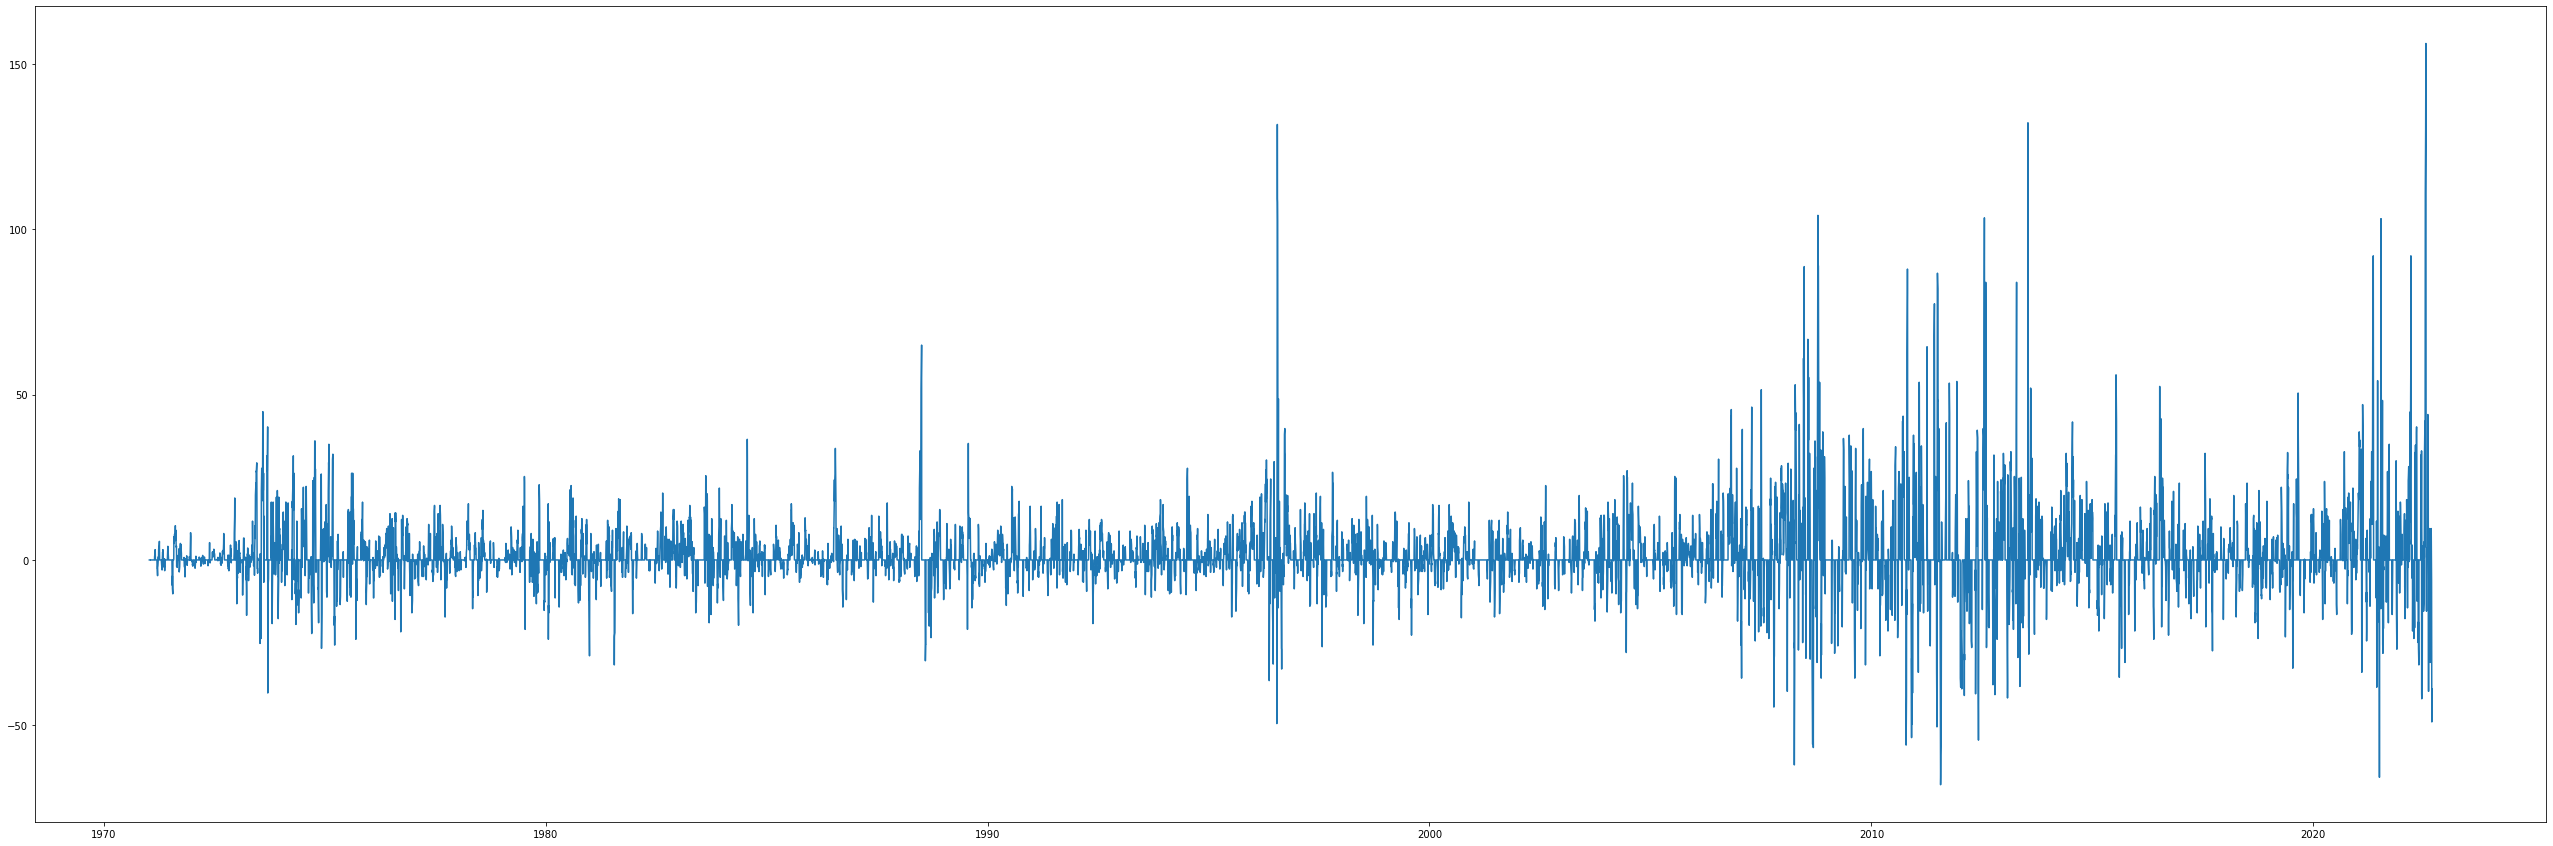

In [689]:
plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'])

plt.show()

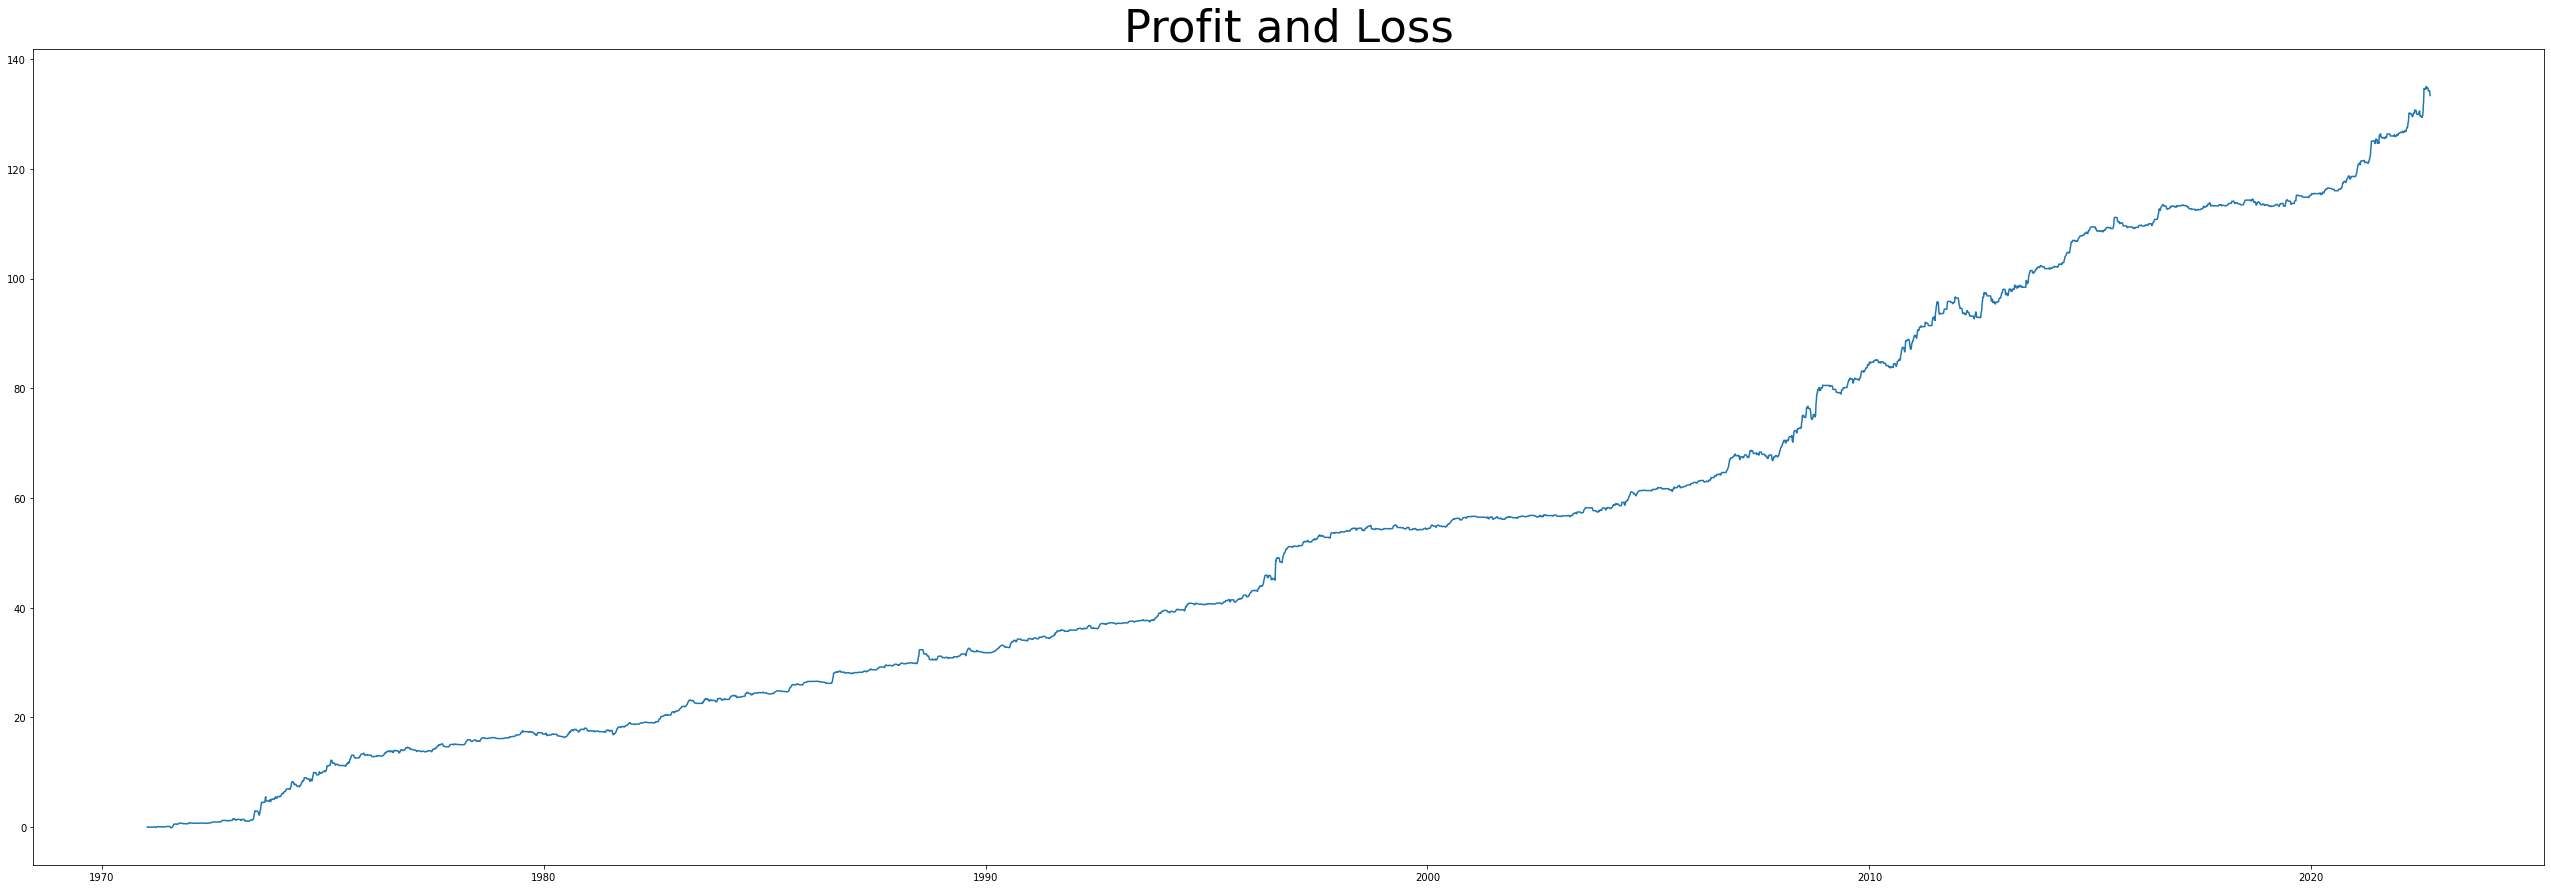

In [690]:
# Cumulative PnL
cumulative_pnl=pnl_df['pnl'].cumsum()/forecast_df['close'][0]

plt.figure(figsize=(45,15))

plt.title('Profit and Loss',fontsize=45)
plt.plot(cumulative_pnl)
plt.show()

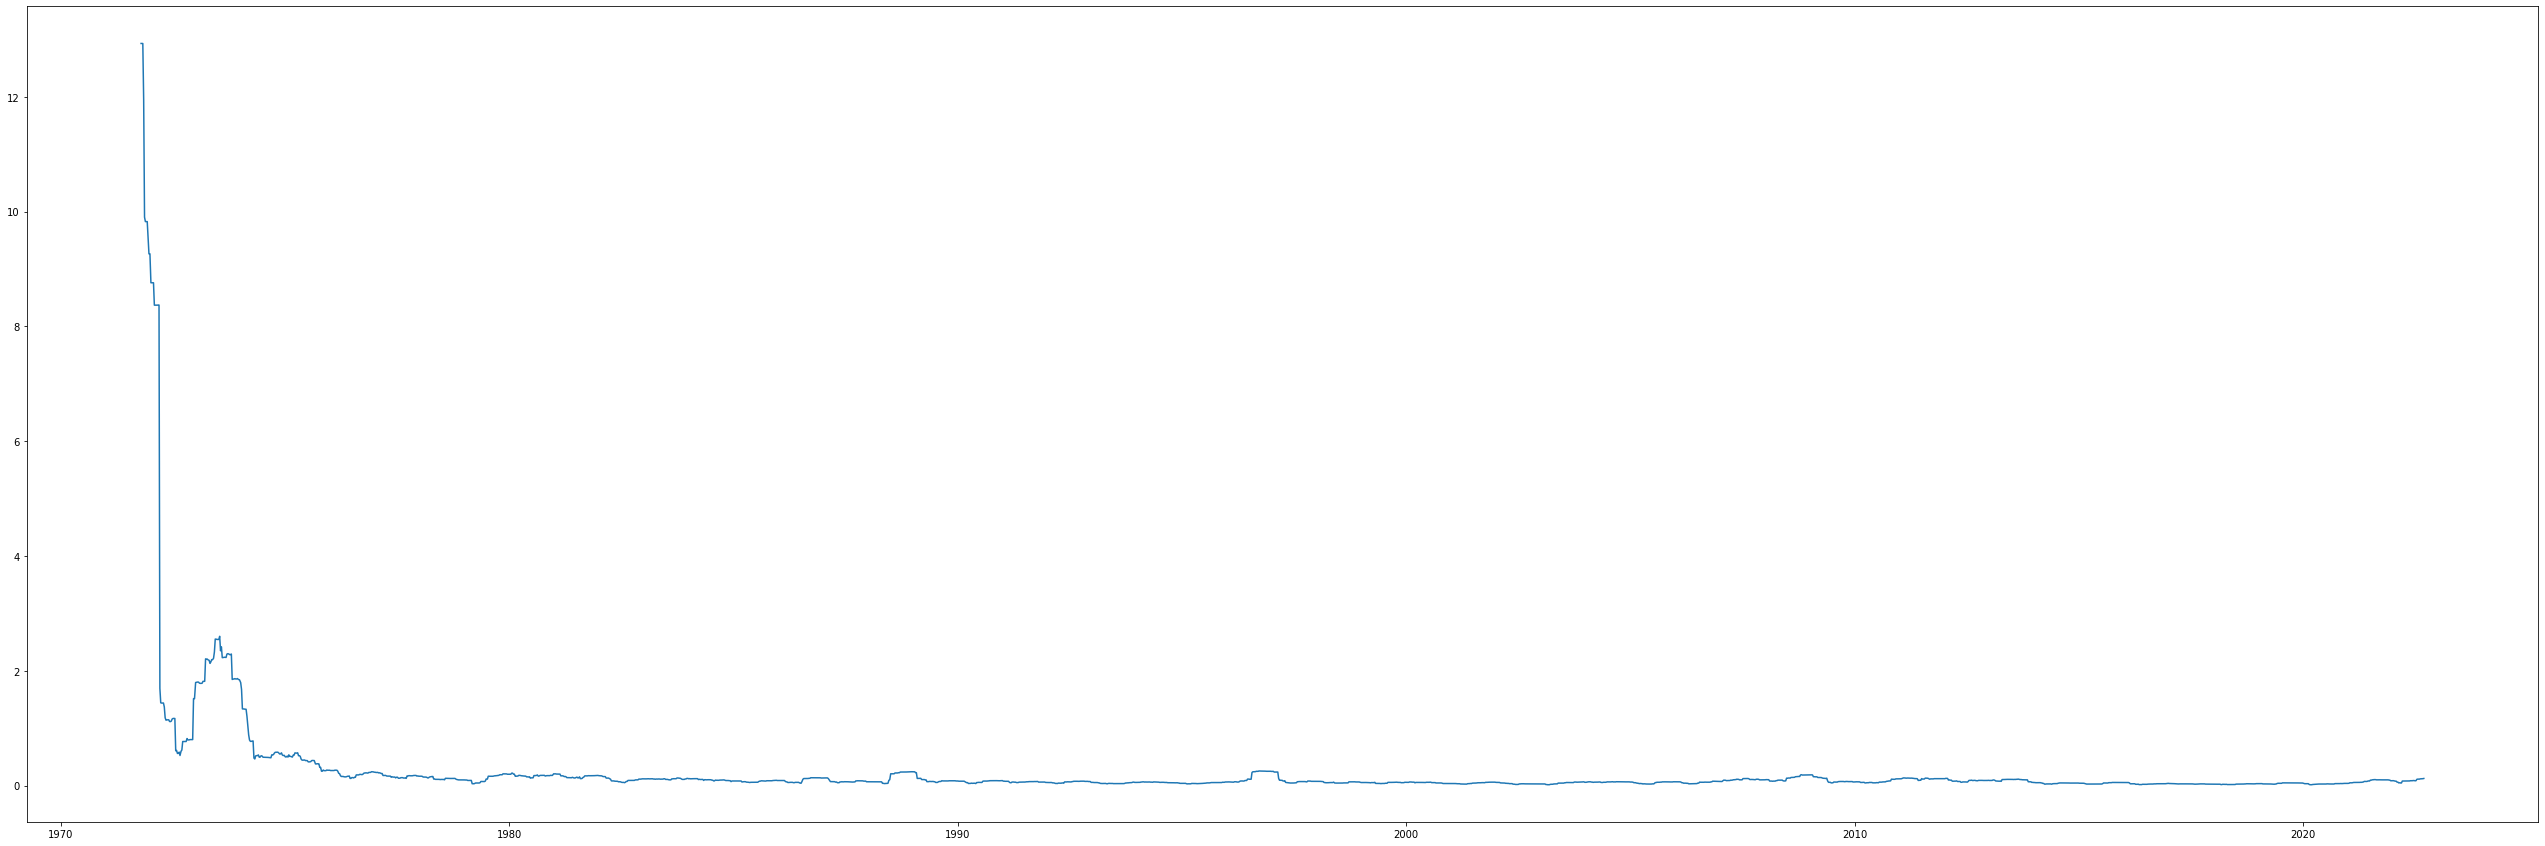

In [691]:
plt.figure(figsize=(45,15))
plt.plot(volatility)
plt.show()

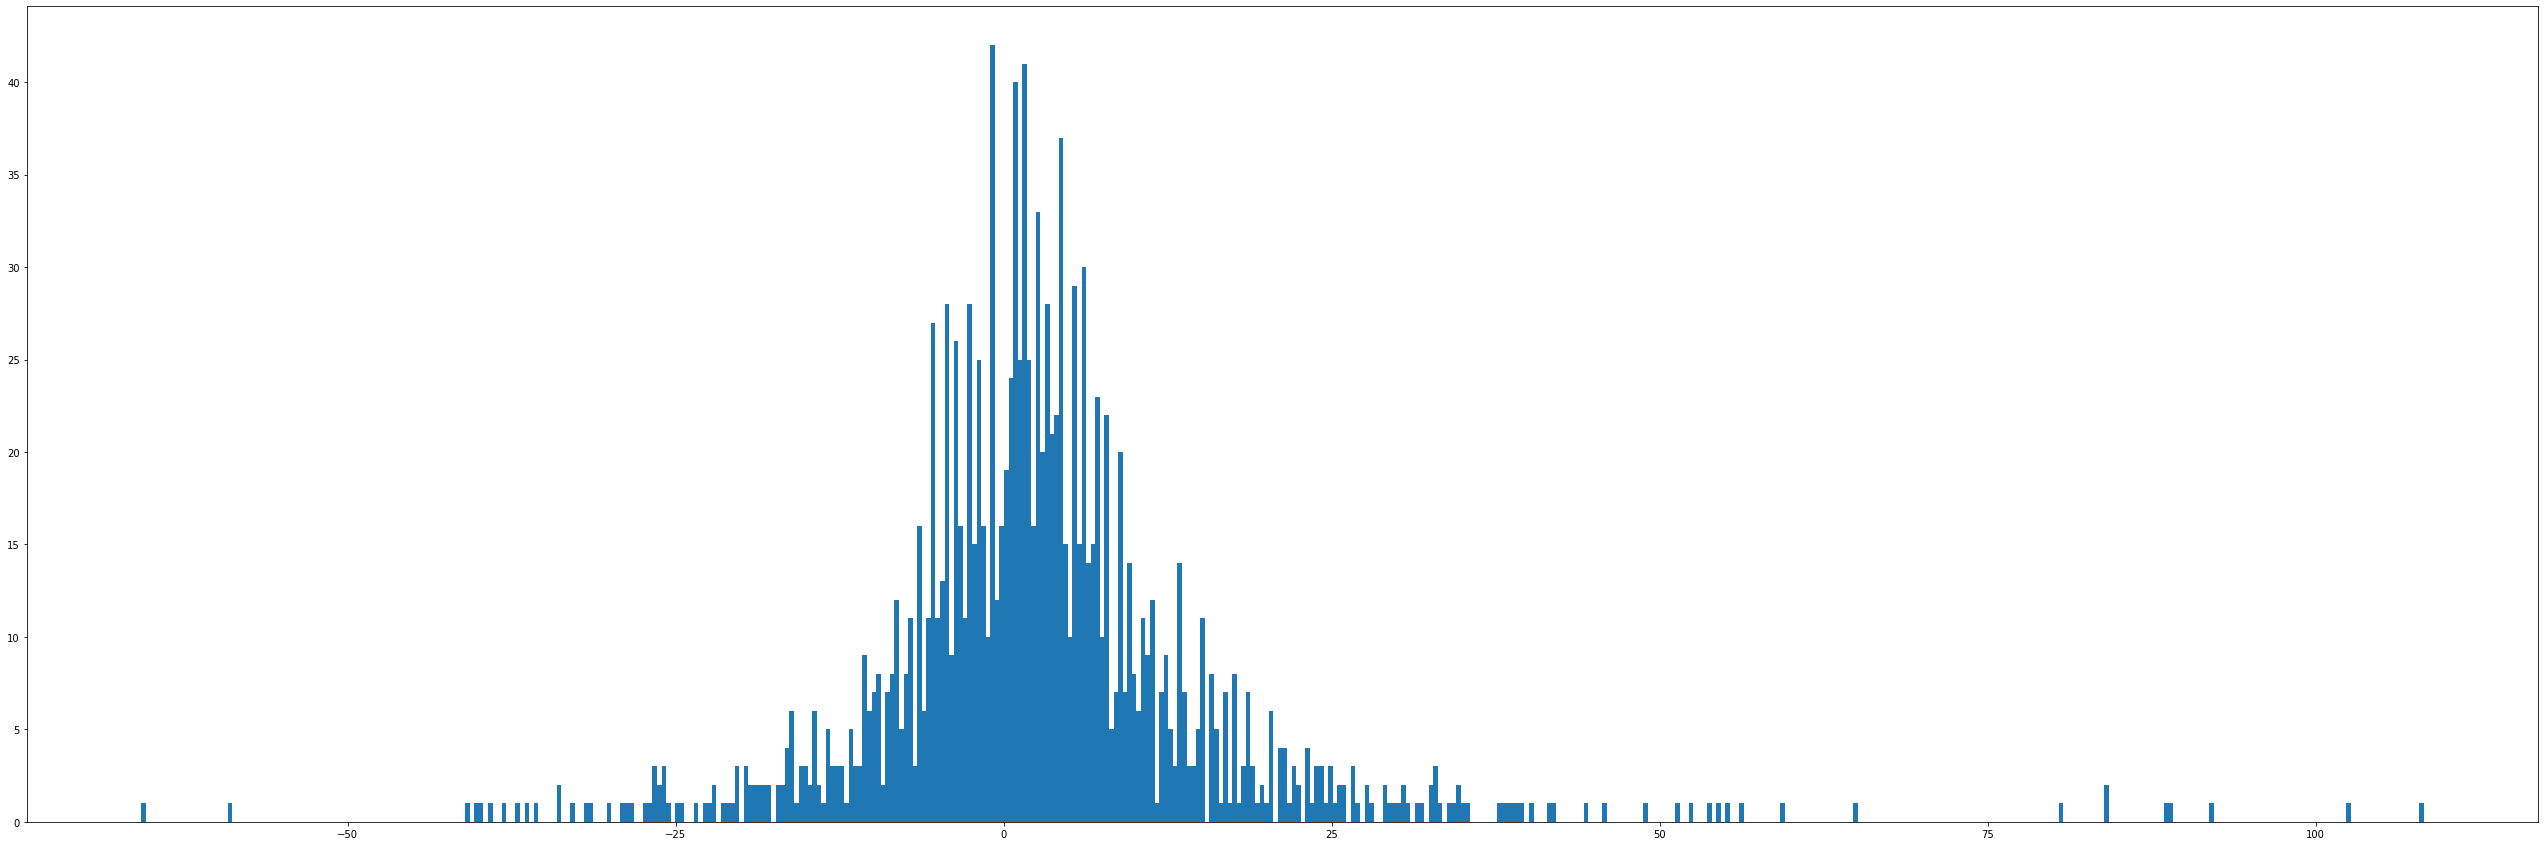

In [692]:
plt.figure(figsize=(45,15))

plt.hist(positions['pnl'][positions['pnl'] != 0],bins=500)

plt.show()

# Compare MA, predictions & actual price

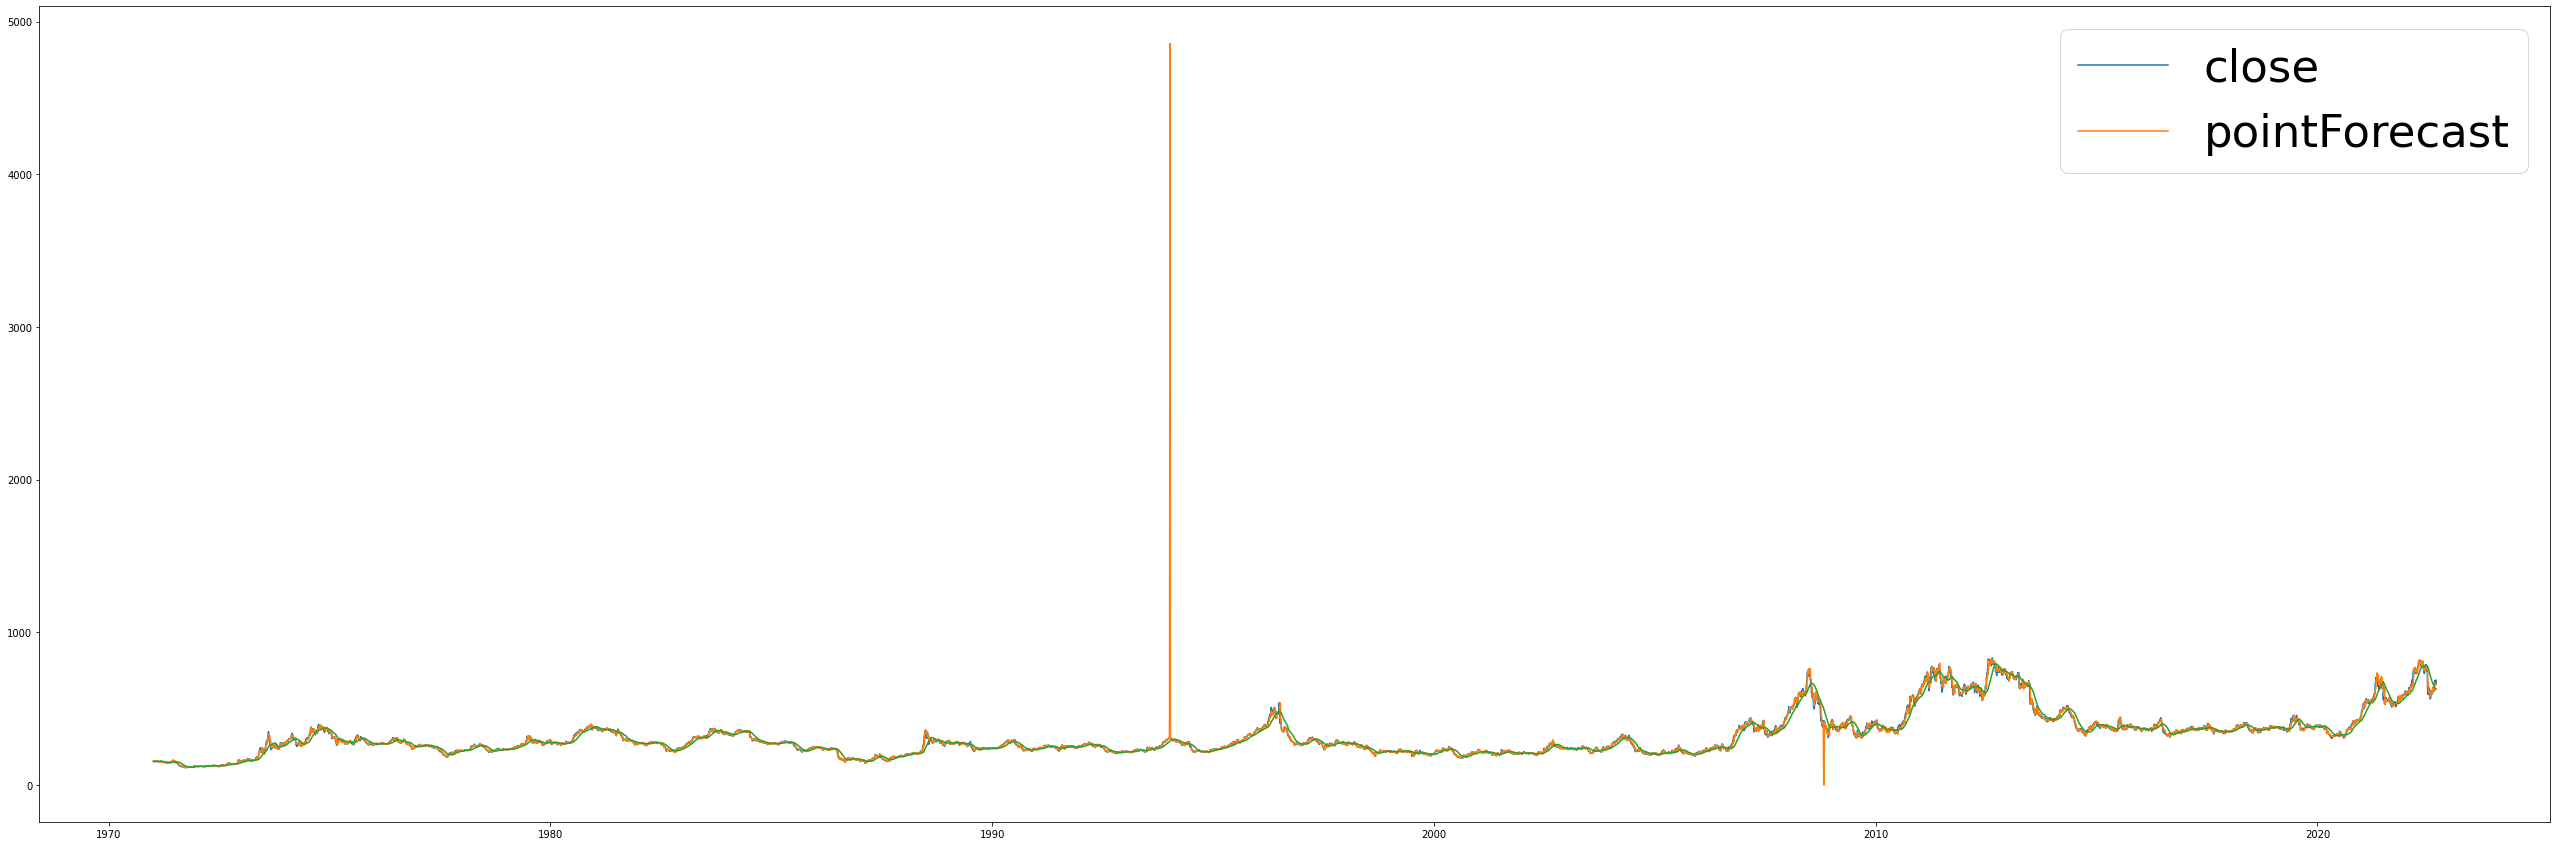

In [693]:
plt.figure(figsize=(45,15))

plt.plot(forecast_df['close'])
plt.plot(forecast_df['pointForecast'])
plt.plot(forecast_df['MA_50'])

plt.legend(['close','pointForecast'],fontsize=45)

plt.savefig(r'pnl.jpg')

plt.show()

# Trade Analytics

In [694]:
print("No. Trades:   ",len(positions['pnl']))
print("relative Pnl: ", relativepnl(positions['pnl']))
print("Hit Rate:     ", hitrate(positions['pnl']))
print("Minimum:      ",np.min(positions['pnl']))
print("Maximum:      ",np.max(positions['pnl']))
print("Mean:         ",np.mean(positions['pnl']))
print("Variance:     ",np.var(positions['pnl']))
print("Std. Dev:     ",np.sqrt(np.var(positions['pnl'])))
print("Skew:         ",skew(positions['pnl']))
print("Kurtosis:     ",kurtosis(positions['pnl']))

No. Trades:    2599
relative Pnl:  1.9772066836178714
Hit Rate:      0.7929176289453426
Minimum:       -65.75
Maximum:       108.25
Mean:          1.5532621247113163
Variance:      104.57217878309972
Std. Dev:      10.226053920408386
Skew:          nan
Kurtosis:      nan


In [695]:
performance_dict = {

    'No._Trades':[len(positions['pnl'])],
    'relative_Pnl':[relativepnl(positions['pnl'])],
    'Hit_Rate':[hitrate(positions['pnl'])],
    'Minimum':[np.min(positions['pnl'])],
    'Maximum':[np.max(positions['pnl'])],
    'Mean':[np.mean(positions['pnl'])],
    'Variance':[np.var(positions['pnl'])],
    'Std_Dev':[np.std(positions['pnl'])],
    'Skew':[np.float(skew(positions['pnl']))],
    'Kurtosis':[np.float(kurtosis(positions['pnl']))],
}





In [697]:
pd.DataFrame(performance_dict).to_csv(r'Performance_arma_ma_(3,3).csv')